# Week 3 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

\begin{align}
\frac{dR}{dE_{r}} = \frac{R_{0}}{rE_{0}} e^{-E_{r}/rE_{0}}
\end{align}

Integrating this from the threshold energy to infinity gives 

\begin{align}
R = R_{0} e^{-E_{r}/rE_{0}}
\end{align}

where

\begin{align}
R_{0} = \frac{N_{A}}{A} \frac{\rho}{m_{\chi}} \sigma_{SI}(\chi + p) \frac{\mu^{2} A^{2}}{m_{p}^{2}} \langle v \rangle
\end{align}

and $\langle v \rangle$ is the average velocity. Rearranging the expression for R to give an expression for $\sigma_{SI}$ as a function of the WIMP particle mass gives

\begin{align}
\sigma_{SI}(\chi + p) = \frac{1}{\mathrm{factor}} R \frac{m_{\chi}}{\mu^{2}} e^{E_{r}/rE_{0}}
\end{align}

where the factor includes all the constants present in R$_{0}$. The value of $\sigma_{SI}(\chi + p)$ can be plotted as a function of the WIMP particle mass. These equations were taken from Particle Cosmology: DM Direct Detection notes from Auke-Pieter Colijn. 

### Define the units

In [50]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1
c = 3e5 * km/s

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
M_solar = 2e30 * kg
g = 1e-3 * kg

# other quantities
m_p = 0.938 * GeV
v0 = 220 * km / s / c
N_A = 6.022e23
rho0 = 0.3 * GeV/cm**3

Define the constants necessary for the computations

In [51]:
# problem related quantities
# A = 131.293 * GeV
A = 131.293 * m_p
m_det = 500 * kg
T = 365*24*3600 * s
E_thresh = 3e3 * eV

m_N = A 

# factor_R0 = T * m_det * N_A * rho0 * A * v0 / m_p**2
# factor_R0 = T * m_det * rho0 * A * (2*v0/np.sqrt(np.pi)) / m_p**2     
factor_R0 = T * m_det * N_A * rho0 * A**2 * (2*v0/np.sqrt(np.pi)) / (A * g * m_p**2)

Define functions that return the reduced mass $\mu$, r, E$_{0}$ and the WIMP proton cross-section $\sigma_{SI}$.

In [52]:
def mu(m_x):
#     m_N = A/N_A * GeV/g
    return m_x*m_N / (m_x + m_N)

def r(m_x):
#     m_N = A/N_A * GeV/g
    return 4*m_x*m_N / (m_x + m_N)**2

def E0(m_x):
#     return 0.5*m_x*(2*v0/np.sqrt(np.pi))**2
    return 0.5*m_x*v0**2

def sigma_px(m_x):
    return m_x*c * max_events * np.exp(E_thresh / (r(m_x) * E0(m_x))) / (factor_R0 * mu(m_x)**2 * c**2)


For a WIMP particle with mass of 100 GeV and a confidence level of 95%, calculate the WIMP proton cross-section.

In [53]:
confidence = 95
m_x = 100 * GeV 

max_events = -np.log(1-confidence/100)

print(sigma_px(m_x)) 

1.112360394423267e-47


## Plot the WIMP proton cross-section as a function of the WIMP particle mass

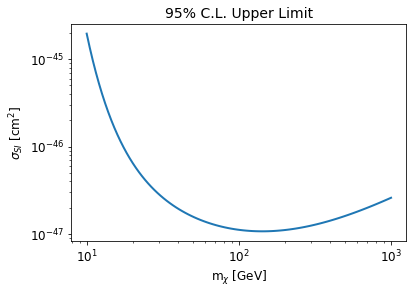

In [60]:
m_arr = np.logspace(1, 3, 100)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(m_arr, sigma_px(m_arr), lw=2)
ax.set_xlabel(r'm$_{\chi}$ [GeV]', fontsize=12)
ax.set_ylabel(r'$\sigma_{SI}$ [cm$^{2}$]', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(r'95% C.L. Upper Limit', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## Part 2

In [77]:
# Recoil energy between 3 and 10 keV
# Mass of WIMP between 10 and 1000 GeV
m = np.logspace(1, 3, 20)
sigma_px = np.logspace(-47, -43, 20) 
# E_r_arr = np.logspace(-3, 1, 20)
x = 3e3*eV
y = 10e3*eV

for E_r_arr in np.arange(x, y):
    R = factor_R0 * sigma_px * mu(m)**2 * np.exp(-E_r_arr / r(m)*E0(m)) / m
print(R)

# plt.figure()
# plt.loglog(m, R)
# plt.show()
                                             
# print(R)

[2.82242122e-11 5.60662414e-11 1.10264223e-10 2.14242821e-10
 4.10285144e-10 7.72412497e-10 1.42567462e-09 2.57294909e-09
 4.52898334e-09 7.75932781e-09 1.29198838e-08 2.08925489e-08
 3.28151599e-08 5.01093498e-08 7.45158468e-08 1.08150298e-07
 1.53592556e-07 2.14019628e-07 2.93389725e-07 3.96684235e-07]


In [9]:
# events = 10
# expected = 12 
    
# def chi_square(n_events, n_expected):
#     difference = n_events - n_expected
#     return (n_events - n_expected)**2 / difference**2

# print(chi_square(events, expected))
    